# 03wk-1: 로지스틱 – 로지스틱, BCELoss, Adam, 로지스틱의 한계

최규빈  
2024-03-13

<a href="https://colab.research.google.com/github/guebin/DL2024/blob/main/posts/02wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

In [1]:
#{{<video https://youtu.be/playlist?list=PLQqh36zP38-xrw8e2pQ1KqKFb-i3lVtsI&si=dDAjAteouM7Y30HU >}}

# 2. Imports

In [23]:
import torch
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [43]:
def plot_loss(loss_fn, ax=None, Wstar=[-1,5]):
    w0hat,w1hat =torch.meshgrid(torch.arange(-10,3,0.1),torch.arange(-1,10,0.1),indexing='ij')
    w0hat = w0hat.reshape(-1)
    w1hat = w1hat.reshape(-1)
    def l(w0hat,w1hat):
        yhat = torch.exp(w0hat+w1hat*x)/(1+torch.exp(w0hat+w1hat*x))
        return loss_fn(yhat,y) 
    loss = list(map(l,w0hat,w1hat))
    #---#
    if ax is None: 
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1,projection='3d')
    ax.scatter(w0hat,w1hat,loss,s=0.001) 
    ax.scatter(w0hat[::20],w1hat[::20],loss[::20],s=0.1,color='C0') 
    w0star,w1star = np.array(Wstar).reshape(-1)
    ax.scatter(w0star,w1star,l(w0star,w1star),s=200,marker='*',color='red',label=f"W=[{w0star:.1f},{w1star:.1f}]")
    #---#
    ax.elev = 15
    ax.dist = -20
    ax.azim = 75    
    ax.legend()
    ax.set_xlabel(r'$w_0$')  # x축 레이블 설정
    ax.set_ylabel(r'$w_1$')  # y축 레이블 설정
    ax.set_xticks([-10,-5,0])  # x축 틱 간격 설정
    ax.set_yticks([-10,-5,0,5,10])  # y축 틱 간격 설정

In [44]:
def learn_and_record(net, loss_fn, optimizr):
    yhat_history = [] 
    loss_history = []
    What_history = []
    Whatgrad_history = []
    What_history.append([net[0].bias.data.item(), net[0].weight.data.item()])
    for epoc in range(100): 
        ## step1 
        yhat = net(x)
        ## step2 
        loss = loss_fn(yhat,y)
        ## step3
        loss.backward() 
        ## step4 
        optimizr.step()
        ## record 
        if epoc % 5 ==0: 
            yhat_history.append(yhat.reshape(-1).data.tolist())
            loss_history.append(loss.item())
            What_history.append([net[0].bias.data.item(), net[0].weight.data.item()])
            Whatgrad_history.append([net[0].bias.grad.item(), net[0].weight.grad.item()])
        optimizr.zero_grad() 
        
    return yhat_history, loss_history, What_history, Whatgrad_history

In [45]:
def show_animation(net, loss_fn, optimizr):
    yhat_history,loss_history,What_history,Whatgrad_history = learn_and_record(net,loss_fn,optimizr)
    
    fig = plt.figure(figsize=(8.5,3.5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ## ax1: 왼쪽그림 
    ax1.scatter(x,y,alpha=0.01)
    ax1.scatter(x[0],y[0],color='C0',label=r"observed data = $(x_i,y_i)$")
    ax1.plot(x,v,'--',label=r"prob (true) = $(x_i,\frac{exp(-1+5x_i)}{1+exp(-1+5x_i)})$")    
    line, = ax1.plot(x,yhat_history[0],'--',label=r"prob (estimated) = $(x_i,\hat{y}_i)$") 
    ax1.legend()
    ## ax2: 오른쪽그림 
    plot_loss(loss_fn,ax2)
    ax2.scatter(np.array(What_history)[0,0],np.array(What_history)[0,1],loss_history[0],color='blue',s=200,marker='*')    
    def animate(epoc):
        line.set_ydata(yhat_history[epoc])
        w0hat = np.array(What_history)[epoc,0]
        w1hat = np.array(What_history)[epoc,1]
        w0hatgrad = np.array(Whatgrad_history)[epoc,0]
        w1hatgrad = np.array(Whatgrad_history)[epoc,1]
        ax2.scatter(w0hat,w1hat,loss_history[epoc],color='grey')
        ax2.set_title(f"What.grad=[{w0hatgrad:.4f},{w1hatgrad:.4f}]",y=0.8)
        fig.suptitle(f"epoch={epoc*5} // What=[{w0hat:.2f},{w1hat:.2f}] // Loss={loss_fn.__class__.__name__} // Opt={optimizr.__class__.__name__}")
        return line
    ani = animation.FuncAnimation(fig, animate, frames=20)    
    plt.close()
    return ani

In [46]:
from matplotlib import animation
plt.rcParams["animation.html"] = "jshtml"

# 3. ToyData1

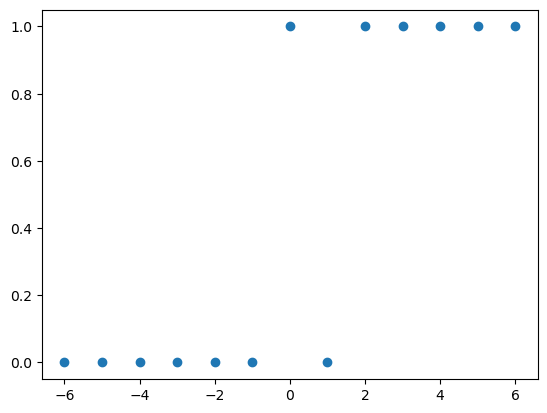

In [47]:
x = torch.tensor([-6,-5,-4,-3,-2,-1, 0, 1, 2, 3, 4, 5, 6.0]).reshape(-1,1)
y = torch.tensor([ 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1]).reshape(-1,1)
plt.plot(x,y,'o')

# 4. ToyData2

우리의 목적: $x_i$가 들어가면 빨간곡선 $\hat{y}_i$의 값을 만들어주는
mapping을 학습해보자.

## Step1: net 설계 (모델링)

`-` 최초의 곡선을 그려보자. ($net: x \to yhat$ 을 수행하는 네트워크를
설계해보자는 의미)

In [48]:
# What = [-0.8,-0.3]

In [49]:
# sigmoid 정의 

In [50]:
# 최초의 직선 plot 

`-` `w0hat + w1hat*x` 이 부분을 `torch.nn.Linear(bias = False)`로 구현

`-` `w0hat + w1hat*x` 이 부분을 `torch.nn.Linear(bias = True)`로 구현

`-` 내가만든 sigmoid 대신에 토치에서 제공하는 sigmoid 사용

`-` 지금까지의 구현 확인

In [51]:
#

`-` 관찰: 지금 아래의 구조이다.

$${\boldsymbol x} \overset{l_1}{\to} {\boldsymbol u} \overset{a_1}{\to} {\boldsymbol v} = \hat{\boldsymbol y}$$

`-` 소망: 함수 $l_1, a_1$ 의 합성을 하나로 묶어서

$$(a_1\circ l_1)({\boldsymbol x}) := net({\boldsymbol x})$$

이러한 기능을 하는 하나의 함수 $net$을 만들 수 없을까?

`-` net 살펴보기: 초보버전 – “파이토치 30일만에 완성하기” 이런책에 보면
내용이 나올지도?

`-` net 살펴보기: 고수버전 – 책 안보고 코딩배우기

## Step 1~4

In [52]:
# 학습률 0.25
# What=[-0.8,-0.3]
# epoch=100

In [53]:
# epoch 4900 추가 

# 5. 학습과정 시각화 및 문제인식

## A. 좋은 초기값

In [54]:
# What = [-0.8,0.3]
# MSELoss 
# SGD, lr = 0.25 
#---#
#show_animation(net,loss_fn,optimizr)

## B. 가능성 있는 초기값

In [55]:
# What = [-3,1]
# MSELoss 
# SGD, lr = 0.25 
#---#
#show_animation(net,loss_fn,optimizr)

## C. 최악의 초기값

In [56]:
# What = [-10,1]
# MSELoss 
# SGD, lr = 0.25 
#---#
#show_animation(net,loss_fn,optimizr)

해결하는 접근법:

-   컴공스타일: 에폭을 늘려볼까?
-   산공스타일: 옵티마이저를 바꿔볼까?
-   통계스타일: Loss를 바꿔볼까?

# 6. 손실함수의 개선

## A. BCE Loss를 사용하여 학습

`-` BCE loss라는게 있음.

-   <https://en.wikipedia.org/wiki/Cross-entropy>

In [57]:
# What = [-0.8,-0.3]
# BCELoss 
# SGD, lr = 0.25 
#---#
# step1~4

`-` loss수식을 못외우겠다면?

In [58]:
# What = [-0.8,-0.3]
# BCELoss 
# SGD, lr = 0.25 
#---#
# step1~4

## B. Loss Function 시각화

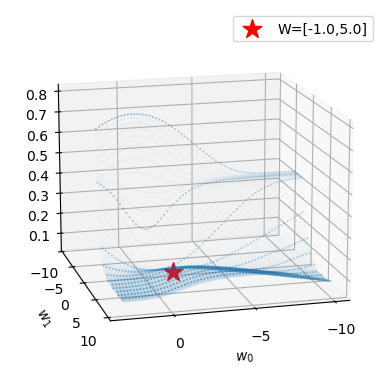

In [59]:
plot_loss(torch.nn.MSELoss())

In [60]:
plot_loss(torch.nn.BCELoss())

`-` 비교해보자.

## C. 학습과정 시각화 – 좋은 초기값

`-` MSELoss

In [61]:
# What = [-0.8,-0.3]
# MSELoss 
# SGD, lr = 0.25 
#---#
#show_animation(net,loss_fn,optimizr)

`-` BCELoss

In [62]:
# What = [-0.8,-0.3]
# BCELoss 
# SGD, lr = 0.25 
#---#
#show_animation(net,loss_fn,optimizr)

## D. 학습과정 시각화 – 가능성 있는 초기값

`-` MSELoss

In [63]:
# What = [-3,1]
# MSELoss 
# SGD, lr = 0.25 
#---#
#show_animation(net,loss_fn,optimizr)

`-` BCELoss

In [64]:
# What = [-3,1]
# BCELoss 
# SGD, lr = 0.25 
#---#
#show_animation(net,loss_fn,optimizr)

## E. 학습과정 시각화 – 최악의 초기값

`-` MSELoss

In [65]:
# What = [-10,1]
# MSELoss 
# SGD, lr = 0.25 
#---#
#show_animation(net,loss_fn,optimizr)

`-` BCELoss

In [66]:
# What = [-10,1]
# BCELoss 
# SGD, lr = 0.25 
#---#
#show_animation(net,loss_fn,optimizr)

# 7. 옵티마이저의 개선

## C. 학습과정 시각화 – 좋은 초기값

`-` MSELoss + SGD

In [67]:
# What = [-0.8,0.3]
# MSELoss 
# SGD, lr = 0.25 
#---#
#show_animation(net,loss_fn,optimizr)

`-` MSELoss + Adam

In [68]:
# What = [-0.8,0.3]
# MSELoss 
# Adam, lr = 0.25 
#---#
#show_animation(net,loss_fn,optimizr)

## D. 학습과정 시각화 – 가능성 있는 초기값

`-` MSELoss + SGD

In [69]:
# What = [-3,1]
# MSELoss 
# SGD, lr = 0.25 
#---#
#show_animation(net,loss_fn,optimizr)

`-` MSELoss + Adam

In [70]:
# What = [-3,1]
# MSELoss 
# Adam, lr = 0.25 
#---#
#show_animation(net,loss_fn,optimizr)

## E. 학습과정 시각화 – 최악의 초기값

`-` MSELoss + SGD

In [71]:
# 생략

`-` MSELoss + Adam

In [72]:
# What = [-10,1]
# MSELoss 
# Adam, lr = 0.25 
#---#
#show_animation(net,loss_fn,optimizr)

# 8. 로지스틱의 한계

## A. 신문기사 (데이터의 모티브)

`-` [스펙이 높아도 취업이 안된다고
합니다..](https://www.joongang.co.kr/article/23637092#home)

**중소·지방 기업 “뽑아봤자 그만두니까”**

중소기업 관계자들은 고스펙 지원자를 꺼리는 이유로 높은 퇴직률을 꼽는다.
여건이 좋은 대기업으로 이직하거나 회사를 관두는 경우가 많다는
하소연이다. 고용정보원이 지난 3일 공개한 자료에 따르면 중소기업
청년취업자 가운데 49.5%가 2년 내에 회사를 그만두는 것으로 나타났다.

중소 IT업체 관계자는 “기업 입장에서 가장 뼈아픈 게 신입사원이 그만둬서
새로 뽑는 일”이라며 “명문대 나온 스펙 좋은 지원자를 뽑아놔도 1년을
채우지 않고 그만두는 사원이 대부분이라 우리도 눈을 낮춰 사람을 뽑는다”고
말했다.

## B. 가짜데이터

In [73]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DL2024/main/posts/dnnex.csv")
df

In [74]:
x = torch.tensor(df.x).float().reshape(-1,1)
y = torch.tensor(df.y).float().reshape(-1,1)
prob = torch.tensor(df.prob).float().reshape(-1,1)

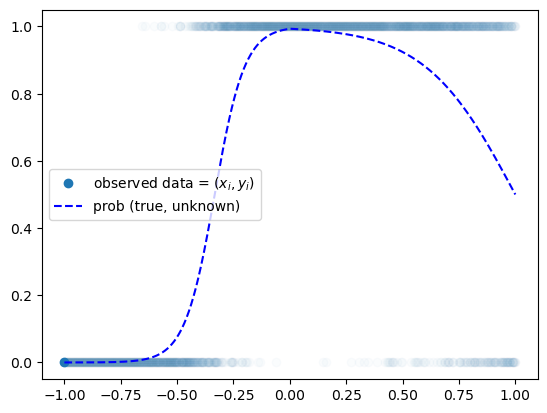

In [75]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(x[0],y[0],'o',label= r"observed data = $(x_i,y_i)$",color="C0")
plt.plot(x,prob,'--b',label= r"prob (true, unknown)")
plt.legend()

## C. 로지스틱으로 적합

In [78]:
# step 1~4 

`-` Epoch을 10억번으로 설정해도 이건 못 맞출것 같음.

-   결국 올라가다가 내려가는 언더라잉을 맞춰야 하는데 현재 모형으로는
    이걸 표현할 수 없다.
-   모형의 표현력이 낮다.

## D. 해결책 (아이디어 수준만)

`-` sigmoid를 넣기 전의 상태가 직선이 아니라 꺽이는 직선이야 한다.

In [79]:
a = torch.nn.Sigmoid()

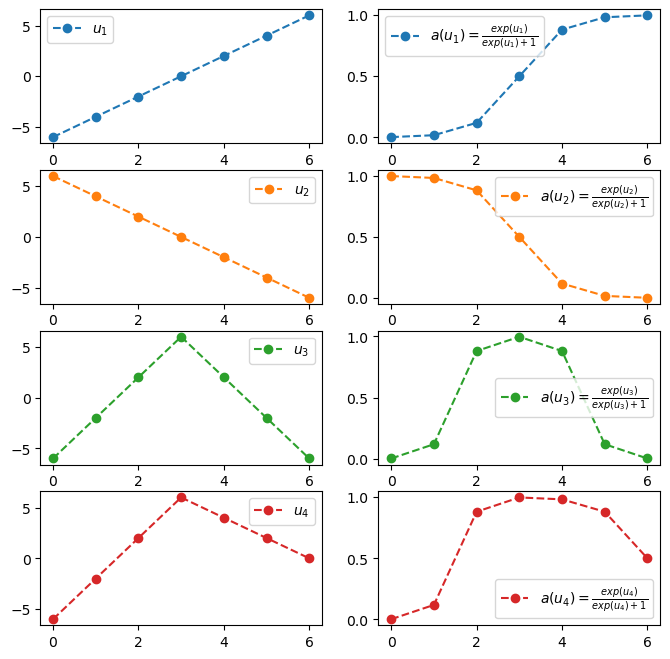

In [80]:
fig,ax = plt.subplots(4,2,figsize=(8,8))
u1 = torch.tensor([-6,-4,-2,0,2,4,6])
u2 = torch.tensor([6,4,2,0,-2,-4,-6])
u3 = torch.tensor([-6,-2,2,6,2,-2,-6])
u4 = torch.tensor([-6,-2,2,6,4,2,0])
ax[0,0].plot(u1,'--o',color='C0',label = r"$u_1$")
ax[0,0].legend()
ax[0,1].plot(a(u1),'--o',color='C0',label = r"$a(u_1)=\frac{exp(u_1)}{exp(u_1)+1}$")
ax[0,1].legend()
ax[1,0].plot(u2,'--o',color='C1',label = r"$u_2$")
ax[1,0].legend()
ax[1,1].plot(a(u2),'--o',color='C1',label = r"$a(u_2)=\frac{exp(u_2)}{exp(u_2)+1}$")
ax[1,1].legend()
ax[2,0].plot(u3,'--o',color='C2', label = r"$u_3$")
ax[2,0].legend()
ax[2,1].plot(a(u3),'--o',color='C2', label = r"$a(u_3)=\frac{exp(u_3)}{exp(u_3)+1}$")
ax[2,1].legend()
ax[3,0].plot(u4,'--o',color='C3', label = r"$u_4$")
ax[3,0].legend()
ax[3,1].plot(a(u4),'--o',color='C3', label = r"$a(u_4)=\frac{exp(u_4)}{exp(u_4)+1}$")
ax[3,1].legend()

# 9. HW

강의노트의 로직스틱 예제 `ToyData2` 에서 다양한 초기값에서 BCE loss 와
Adma을 이용하여 학습해보고 시각화해보라.